10470
[ 13  19  17  29  48  60 136 169 242 348 468 559 663 705 767 831 871 872
 828 769 718 545 360 225 111  54  15   6]
[   5.01187234    6.30957344    7.94328235   10.           12.58925412
   15.84893192   19.95262315   25.11886432   31.6227766    39.81071706
   50.11872336   63.09573445   79.43282347  100.          125.89254118
  158.48931925  199.5262315   251.18864315  316.22776602  398.10717055
  501.18723363  630.95734448  794.32823472 1000.         1258.92541179
 1584.89319246 1995.26231497 2511.88643151 3981.07170553]
[  3  18  23  37  50  80 109 191 264 312 407 555 643 727 798 814 970 849
 808 820 665 488 352 217  80  33   5  10]
[   5.01187234    6.30957344    7.94328235   10.           12.58925412
   15.84893192   19.95262315   25.11886432   31.6227766    39.81071706
   50.11872336   63.09573445   79.43282347  100.          125.89254118
  158.48931925  199.5262315   251.18864315  316.22776602  398.10717055
  501.18723363  630.95734448  794.32823472 1000.         1258.92541

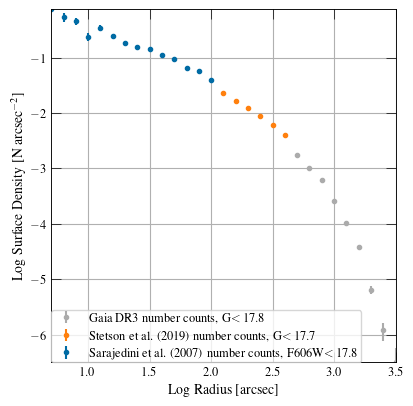

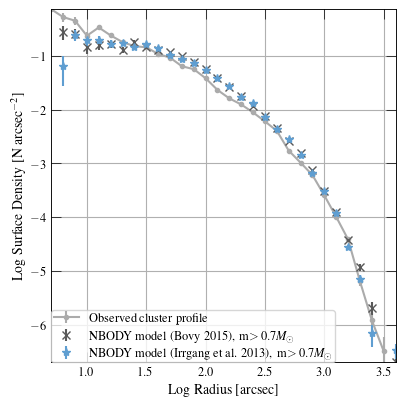

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib_inline
import orbits
from matplotlib import ticker

mpl.style.use('default')
mpl.style.use('tableau-colorblind10')
mpl.style.use('./MNRAS_Style.mplstyle')
mpl.rcParams['figure.figsize'] = [12/3, 12/3]

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

nbody = np.loadtxt('2024-04-07/ngc6397.out')
nbody_irr = np.loadtxt('2024-04-28/ngc6397.out')

def get_nbdis(nb):
    m80 = (nb[:,8] < 10) & (nb[:,7] >= 0.7) 
    d = 3600.0 * np.sqrt((nb[:,1][m80]-orbits.RA)**2 * np.cos(orbits.DEC/180.0*np.pi)**2+(nb[:,2][m80]-orbits.DEC)**2) 
    return d

def nobs(dx):
    #logbins = np.logspace(np.log10(np.amin(dx)), np.log10(np.amax(dx)), 25)
    #logbins = 10**np.hstack((stitched[:,0], 3.6))
    #logbins = np.logspace(0, 3.5, 35)

    #counts, edges = np.histogram(dx, bins=np.hstack((logbins)))
    #return counts, edges
    
    counts=[]
    edges=[]
    r = 0.7
    dxl = np.log10(dx)
    while r < 3.5:
        counts.append(np.sum((dxl > r) & (dxl <= r + 0.1)))
        edges.append(r)
        r += 0.1
    edges += [3.6]
    
    return np.array(counts), 10**np.array(edges)
    
def surface_density(counts, edges, ax, label, fmt, color, err=None, ref=None):
    mask = counts > 0
    area = np.pi * (edges[1:]**2 - edges[:-1]**2)
    print(counts)
    print(edges)
    
    n = counts[mask]
    n_area = (n / area[mask])
    nsq_area = np.sqrt(n) / area[mask]
    
    x = np.log10(edges[1:][mask])
    #y = np.log10(n_area)
    
    #x = edges[1:][mask]
    y = n_area

    error = err or nsq_area
    return ax.errorbar(x, y, yerr=error, fmt=fmt, label=label, color=color)

def nb_dens(nb, ax, **kwargs):
    counts, edges = nobs(nb)
    return surface_density(counts, edges, ax, **kwargs)

nbdis = get_nbdis(nbody)
nbdis_irr = get_nbdis(nbody_irr)

print(np.sum(nbdis <= 3550))

hst = np.loadtxt('./HST_sdens.txt')
ste = np.loadtxt('./Stetson_sdens.txt')
gaia = np.loadtxt('./Gaia_sdens.txt')


fig, ax = plt.subplots(ncols=1)
fig.tight_layout()

ax.set_xlabel(r'Log Radius [arcsec]')
ax.set_ylabel(r'Log Surface Density [N arcsec$^{-2}$]')
ax.grid()
ax.minorticks_off()
#ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.LogFormatterExponent())
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

stitched = np.vstack((hst, ste, gaia))

background = 6.4e-7

#l1 = ax.errorbar(stitched[:,0], 10**stitched[:,5] - 6.4e-7, yerr=stitched[:,6], ms=2, fmt='o', color='k', label='Background subtracted profile')
#l1[-1][0].set_linestyle('--')

sdens = np.loadtxt('./sdens')
#sdens = sdens[sdens[:,0] >= 2.925]

#gi = sdens[:,0] > ste[-1,0]
#l1 = ax.errorbar(sdens[:,0][gi], 10**sdens[:,2][gi], sdens[:,3][gi], fmt='o', color='k', label='Background subtracted profile')
#l1[-1][0].set_linestyle('--')


l2 = ax.errorbar(hst[:,0], 10**hst[:,5], yerr=hst[:,6], fmt='o', ms=3, label='Sarajedini et al. (2007) number counts, F606W$<17.8$')
l3 = ax.errorbar(ste[:,0], 10**ste[:,5], yerr=ste[:,6], fmt='o', ms=3, label='Stetson et al. (2019) number counts, G$<17.7$')
#l4 = ax.errorbar(gaia[:,0][gi], 10**gaia[:,1][gi], yerr=sdens[:,3][gi], fmt='o', label='Gaia DR3 number counts. G$<19.5$')
l5 = ax.errorbar(gaia[:,0], 10**gaia[:,5], yerr=gaia[:,6], fmt='o', ms=3, label='Gaia DR3 number counts, G$<17.8$')

#ax.vlines(np.log10(3550), -9, 1, colors='k', linestyles='dotted')

ax.legend(loc='lower left', handles=[l5, l3, l2], borderaxespad=0., borderpad=0.2)

fig.savefig('hst-sd.pdf')

fig, ax = plt.subplots(ncols=1)
fig.tight_layout()

ax.set_xlabel(r'Log Radius [arcsec]')
ax.set_ylabel(r'Log Surface Density [N arcsec$^{-2}$]')
ax.grid()
ax.minorticks_off()
#ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.LogFormatterExponent())
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))


#l1 = ax.errorbar(stitched[:,0], 10**stitched[:,5], yerr=stitched[:,6], ms=2, fmt='o', color='k', label='Background subtracted profile')
#l1[-1][0].set_linestyle('--')
#l2 = ax.errorbar(hst[:,0], 10**hst[:,5], yerr=hst[:,6], ms=3, fmt='o', label='Sarajedini et al. (2007) number counts, F606W$<17.8$')
#l3 = ax.errorbar(ste[:,0], 10**ste[:,5], yerr=ste[:,6], ms=3, fmt='o', label='Stetson et al. (2019) number counts, G$<17.7$')
#l4 = ax.errorbar(gaia[:,0], 10**gaia[:,5], yerr=gaia[:,6], ms=3, fmt='o', label='Gaia DR3 number counts, G$<17$')
#l1 = ax.errorbar(sdens[:,0][gi], 10**sdens[:,2][gi], sdens[:,3][gi], fmt='o', color='k', label='Background subtracted profile')
#l1[-1][0].set_linestyle('--')


#stitched = np.vstack((
    #np.column_stack((hst[:,0], hst[:,5], hst[:,6])),
    #np.column_stack((ste[:,0], ste[:,5], ste[:,6])),
    #np.column_stack((sdens[:,0][gi], sdens[:,1][gi], sdens[:,3][gi]))
#))
l2 = ax.errorbar(stitched[:,0], 10**stitched[:,5], yerr=stitched[:,6], fmt='-o', ms=3, color=colors[2], label='Observed cluster profile')
l5 = nb_dens(nbdis, ax, label='NBODY model (Bovy 2015), m$>0.7 M_\\odot$', fmt='x', color='#595959')
l6 = nb_dens(nbdis_irr, ax, label='NBODY model (Irrgang et al. 2013), m$>0.7 M_{\\odot}$', fmt='*', color='#5F9ED1')
ax.legend(loc='lower left', handles=[l2,l5,l6], borderaxespad=0., borderpad=0.2)

fig.savefig('hst-sd-nb.pdf')
